In [94]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [95]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from transformers import BertTokenizer, TFBertModel
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import HistGradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from multiprocessing import cpu_count


In [96]:
kaggle = False

In [97]:
filepath = 'data/reviews.csv' if not kaggle else './kaggle/input/consumer-review-of-clothing-product/Consumer Review of Clothing Product/data_amazon.xlsx - Sheet1.csv'

df = pd.read_csv(filepath)

display(df)

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,0.0,0.0,1.0,0.0,0.0
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,1.0,0.0,0.0,0.0,1.0
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0.0,1.0,0.0,0.0,0.0
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0.0,0.0,0.0,0.0,1.0


In [98]:
clean_df = df.dropna(subset = ['Title', 'Review']).drop(columns = ['Materials', 'Construction', 'Color', 'Finishing', 'Durability'])
clean_df.head()

,Title,Review,Cons_rating,Cloth_class
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5.0,Knits


In [99]:

cloth_class = clean_df['Cloth_class'].unique()
clean_df['Cloth_class'] = clean_df['Cloth_class'].replace(cloth_class, range(len(cloth_class)))

X = clean_df.drop(["Cons_rating","Title","Review"], axis=1)
Y = clean_df["Cons_rating"]

In [100]:
models = []

In [101]:
def train_test(name,model,grid={}):
    print(name)
    res_grid = None
    test_size = 0.3
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=42)
    res = GridSearchCV(model,grid)
    res.fit(X_train,Y_train)
    res_grid = res.best_params_
    scores = [res.score(X_train,Y_train),res.score(X_test,Y_test)]
    
    print("Train score: ", scores[0])
    print("Test score: ", scores[1])
    print("Best params: ", res_grid)
    print("\n\n\n")
    
    models.append((name,scores[0],scores[1],res_grid))
    return res,res_grid,scores
    

In [102]:

name = "Logistic Regression"
logistic_grid = {'C':[0.1,1,10]}
train_test(name,LogisticRegression(),logistic_grid)

Logistic Regression


Train score:  0.5739818433993191
Test score:  0.5810840626608811
Best params:  {'C': 0.1}






(GridSearchCV(estimator=LogisticRegression(), param_grid={'C': [0.1, 1, 10]}),
 {'C': 0.1},
 [0.5739818433993191, 0.5810840626608811])

In [103]:

name = "SVC"

for kernel in ['rbf','linear','poly','sigmoid']:
    svc_grid = {'C':[0.1,1,10]}
    train_test(f"{name} {kernel}",SVC(kernel=kernel),svc_grid)


SVC rbf
Train score:  0.5739818433993191
Test score:  0.5810840626608811
Best params:  {'C': 0.1}




SVC linear
Train score:  0.5739818433993191
Test score:  0.5810840626608811
Best params:  {'C': 0.1}




SVC poly
Train score:  0.5739818433993191
Test score:  0.5810840626608811
Best params:  {'C': 0.1}




SVC sigmoid


KeyboardInterrupt: 

Random Forest Classifier
Cross Validation Scores:  [0.57383767 0.57399527 0.57399527 0.57399527 0.57408575]
Mean Cross Validation Score:  0.5739818466745569
Standard Deviation of Cross Validation Scores:  8.015525112999632e-05


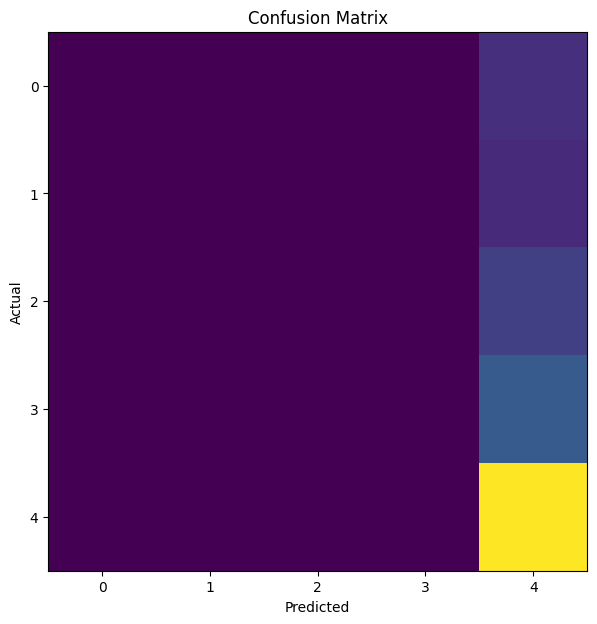

(GridSearchCV(estimator=RandomForestClassifier(),
              param_grid={'max_depth': [None, 10, 100],
                          'n_estimators': [10, 100, 1000]}),
 {'best_params': {'max_depth': None, 'n_estimators': 10},
  'best_score': 0.5739818466745569},
 array([0.57383767, 0.57399527, 0.57399527, 0.57399527, 0.57408575]))

In [ ]:

name = "Random Forest Classifier"
random_forest_grid = {'n_estimators':[10,100,1000], 'max_depth':[None,10,100]}
train_test(name,RandomForestClassifier(),random_forest_grid)

KNN
Cross Validation Scores:  [0.39007092 0.47281324 0.55918046 0.49613869 0.56825347]
Mean Cross Validation Score:  0.49729135550726067
Standard Deviation of Cross Validation Scores:  0.06474968799041331


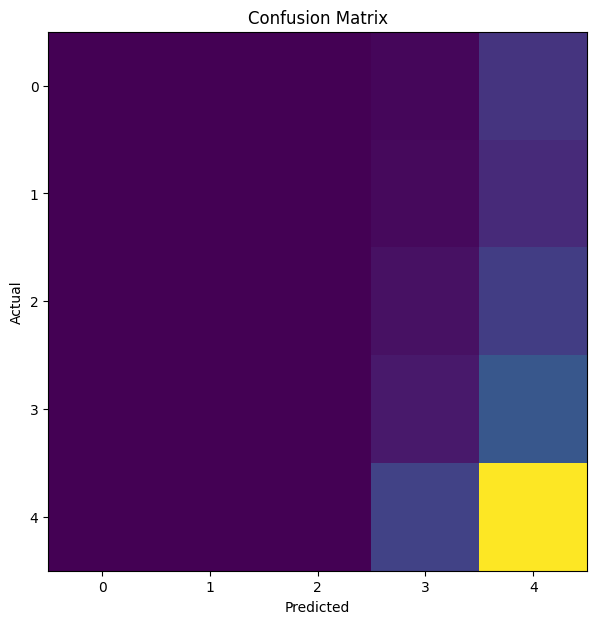

(GridSearchCV(estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [1, 5, 10]}),
 {'best_params': {'n_neighbors': 10}, 'best_score': 0.49729135550726067},
 array([0.39007092, 0.47281324, 0.55918046, 0.49613869, 0.56825347]))

In [ ]:

name = "KNN"
knn_grid = {'n_neighbors':[1,5,10]}
train_test(name,KNeighborsClassifier(),knn_grid)

In [ ]:

name = "Naive Bayes"
train_test(name,MultinomialNB())

Naive Bayes
Cross Validation Scores:  [0.57383767 0.57399527 0.57399527 0.57399527 0.57408575]
Mean Cross Validation Score:  0.5739818466745569
Standard Deviation of Cross Validation Scores:  8.015525112999632e-05


UnboundLocalError: cannot access local variable 'res' where it is not associated with a value

In [ ]:

name = "Decision Tree"
decision_tree_grid = {'max_depth':[None,10,100]}
train_test(name,DecisionTreeClassifier(),decision_tree_grid)

In [ ]:

name = "LightGBM"
lightgbm_grid = {'num_leaves':[10,100,1000]}
train_test(name,lgb.LGBMClassifier(),lightgbm_grid)

In [ ]:

name = "XGBoost"
xgboost_grid = {'max_depth':[10,100,1000]}
train_test(name,xgb.XGBClassifier(),xgboost_grid)

In [ ]:

name = "CatBoost"
catboost_grid = {'max_depth':[10,100,1000]}
train_test(name,cb.CatBoostClassifier(verbose=False),catboost_grid)

In [ ]:

name = "HGBoost"
hgboost_grid = {'max_depth':[10,100,1000]}
train_test(name,HistGradientBoostingClassifier(),hgboost_grid)

In [ ]:
models

In [ ]:

def neural_network_model():
    model = keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

name = "Neural Network"
train_test(name,neural_network_model(),plot_confusion=False)

In [ ]:
models

[('Logistic Regression',
  0.5738376674546888,
  0.5739952718676123,
  0.5739952718676123,
  0.5739952718676123,
  0.5740857503152585,
  {'best_params': {'C': 0.1}, 'best_score': 0.5739818466745569}),
 ('SVC rbf',
  0.5738376674546888,
  0.5739952718676123,
  0.5739952718676123,
  0.5739952718676123,
  0.5740857503152585,
  {'best_params': {'C': 0.1}, 'best_score': 0.5739818466745569}),
 ('SVC linear',
  0.5738376674546888,
  0.5739952718676123,
  0.5739952718676123,
  0.5739952718676123,
  0.5740857503152585,
  {'best_params': {'C': 0.1}, 'best_score': 0.5739818466745569}),
 ('SVC poly',
  0.5738376674546888,
  0.5739952718676123,
  0.5739952718676123,
  0.5739952718676123,
  0.5740857503152585,
  {'best_params': {'C': 0.1}, 'best_score': 0.5739818466745569}),
 ('SVC sigmoid',
  0.5208825847123719,
  0.5257683215130023,
  0.5279747832939322,
  0.514736012608353,
  0.5256935687263556,
  {'best_params': {'C': 0.1}, 'best_score': 0.5230110541708031}),
 ('Random Forest Classifier',
  0.57